Epoch 0: 1540.6222785668713
Epoch 1: 1310.393779345921
Epoch 2: 1146.4760490145002
Epoch 3: 1029.7845240440886
Epoch 4: 946.7246129172189
Epoch 5: 887.6131689848733
Epoch 6: 845.5532706578573
Epoch 7: 815.6328357458115
Epoch 8: 794.35340256989
Epoch 9: 779.2236708714848
Epoch 10: 768.4698053768703
Epoch 11: 760.8288959009307
Epoch 12: 755.4017693286851
Epoch 13: 751.5485647803262
Epoch 14: 748.8137897253036
Epoch 15: 746.8734387646297
Epoch 16: 745.4970784951805
Epoch 17: 744.5207530595362
Epoch 18: 743.8281127743069
Epoch 19: 743.3361862261025
Epoch 20: 742.9863430884711
Epoch 21: 742.7367935545695
Epoch 22: 742.557934172252
Epoch 23: 742.428849945111
Epoch 24: 742.3347473204846
Epoch 25: 742.2650701137526
Epoch 26: 742.2123571981987
Epoch 27: 742.1715012057906
Epoch 28: 742.1388380747466
Epoch 29: 742.1116871124223
Epoch 30: 742.088336464195
Epoch 31: 742.0675574761061
Epoch 32: 742.0484084153459
Epoch 33: 742.030343812846
Epoch 34: 742.0129764605136
Epoch 35: 741.9960005354313
Epoch

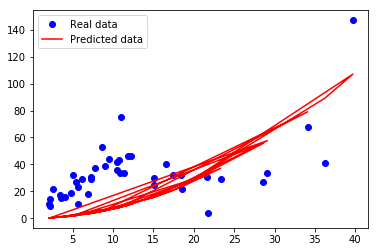

In [13]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

DATA_FILE = "slr05.xls"

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')
u = tf.Variable(0.0, name='weights2')
# Step 4: build model to predict Y
Y_predicted = X *X  * w + X * u +  b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00000001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(200): # train the model 100 epochs
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w, u , b = sess.run([w, u,  b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * X * w + X * u + b, 'r', label='Predicted data')
plt.legend()
plt.show()